In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\thahi\OneDrive\文件\Job\Data Analysis\Project\Python\Pandas\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
# Inspecting null values

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
# All available platforms

df['Platform'].value_counts() 

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [17]:
# All games available

df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [25]:
# Start and End year of data

print(df['Year'].min())
print(df['Year'].max())

1980.0
2020.0


In [33]:
# No. of games per platform

Games_per_platform = df.groupby('Platform')['Name'].count().sort_values(ascending=False)
Games_per_platform

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64

In [37]:
# Global Sales of each Genre

df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)     

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

In [55]:
# Global Sales of each Genre using Pivot Table

Genre_grouped = df.pivot_table(index= 'Genre', values = 'Global_Sales', aggfunc = 'sum') 
Genre_grouped = Genre_grouped.sort_values(by='Global_Sales')
Genre_grouped

,Global_Sales
Genre,
Strategy,175.12
Adventure,239.04
Puzzle,244.95
Simulation,392.20
Fighting,448.91
Racing,732.04
Misc,809.96
Platform,831.37
Role-Playing,927.37


<Axes: title={'center': 'Genre Popularity based on Global Sales'}, xlabel='Global Sales', ylabel='Genre'>

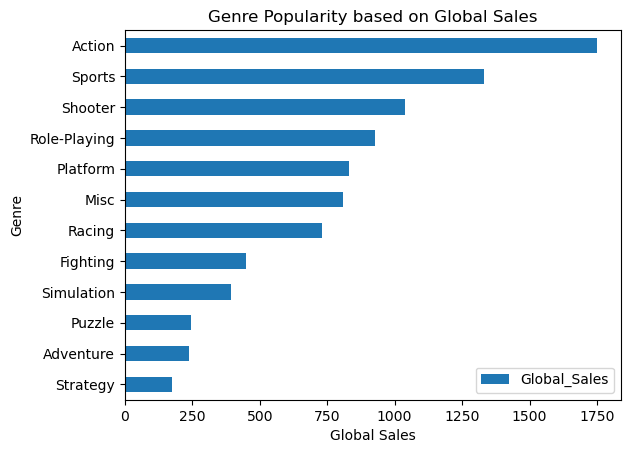

In [61]:
# Plot the Pivot table data

Genre_grouped.plot(kind = 'barh', title = 'Genre Popularity based on Global Sales', xlabel = 'Global Sales', ylabel = 'Genre')

In [75]:
# Global Sales for each Publisher

Publisher_grouped = df.pivot_table(index= 'Publisher', values = 'Global_Sales', aggfunc = 'sum') 
Publisher_grouped = Publisher_grouped.sort_values(by='Global_Sales', ascending = False)
Publisher_grouped

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
...,...
Ongakukan,0.01
Commseed,0.01
Takuyo,0.01


In [109]:
# Top 10 picks for visualization

Publisher_grouped_top = Publisher_grouped.head(10).sort_values(by='Global_Sales')
Publisher_grouped_top

,Global_Sales
Publisher,
Namco Bandai Games,254.09
Sega,272.99
Konami Digital Entertainment,283.64
THQ,340.77
Take-Two Interactive,399.54
Ubisoft,474.72
Sony Computer Entertainment,607.50
Activision,727.46
Electronic Arts,1110.32


<Axes: title={'center': 'Top Publisher based on Global Sales'}, xlabel='Global Sales', ylabel='Publisher'>

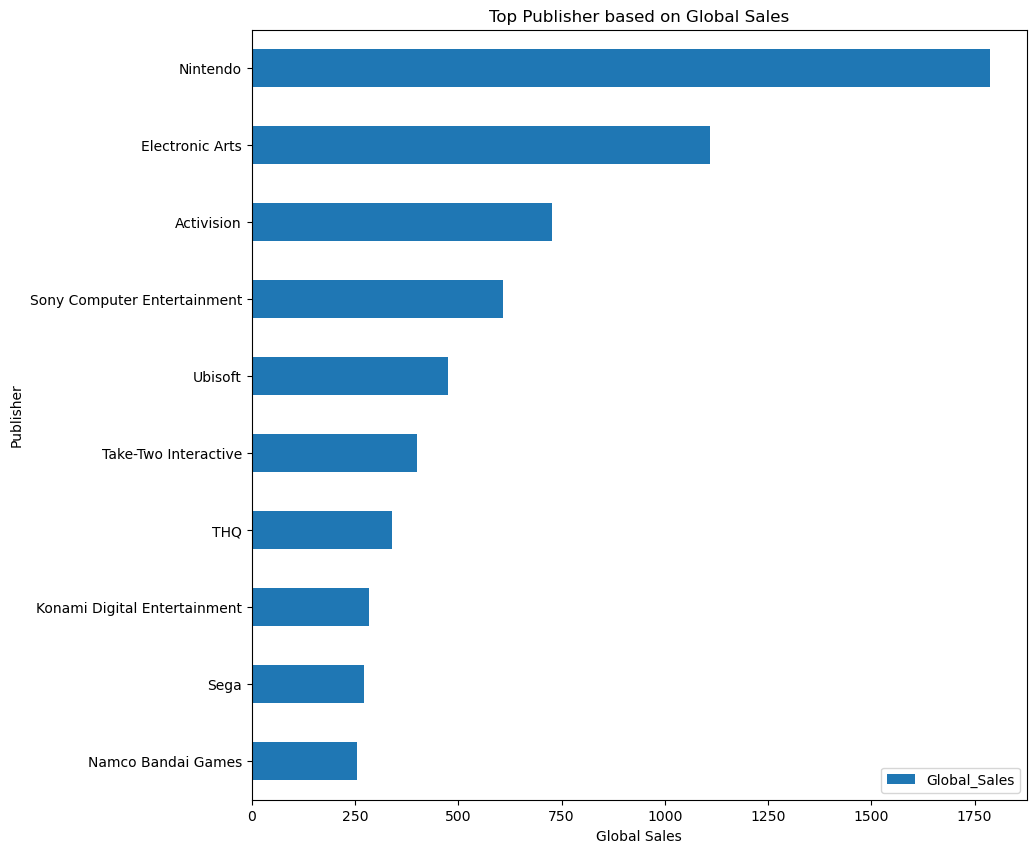

In [121]:
Publisher_grouped_top.plot(kind='barh', title = 'Top Publisher based on Global Sales', xlabel = 'Global Sales')

In [123]:
# Top 10 Platforms

Platforms_grouped = df.pivot_table(index= 'Platform', values = 'Global_Sales', aggfunc = 'sum') 
Platforms_grouped = Platforms_grouped.sort_values(by='Global_Sales', ascending = False).head(10)
Platforms_grouped

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


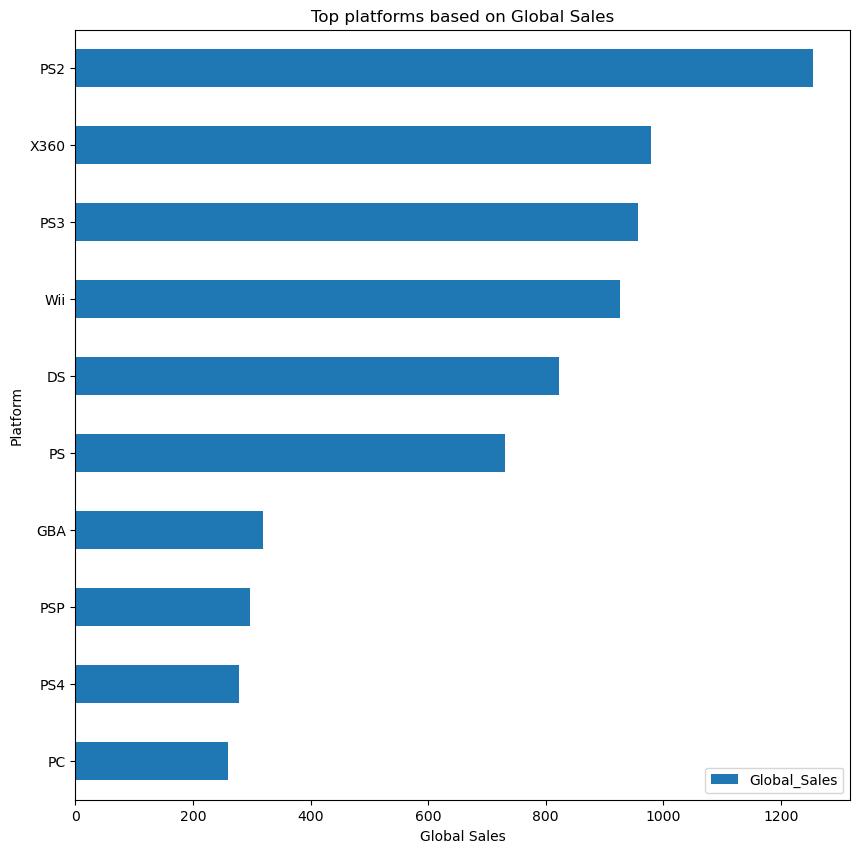

In [131]:
# Plot the data

Platforms_grouped.plot(kind='barh', title = 'Top platforms based on Global Sales', xlabel='Global Sales').invert_yaxis()

                                Global_Sales
Name                                        
Wii Sports                             82.74
Grand Theft Auto V                     55.92
Super Mario Bros.                      45.31
Tetris                                 35.84
Mario Kart Wii                         35.82
Wii Sports Resort                      33.00
Pokemon Red/Pokemon Blue               31.37
Call of Duty: Black Ops                31.03
Call of Duty: Modern Warfare 3         30.83
New Super Mario Bros.                  30.01


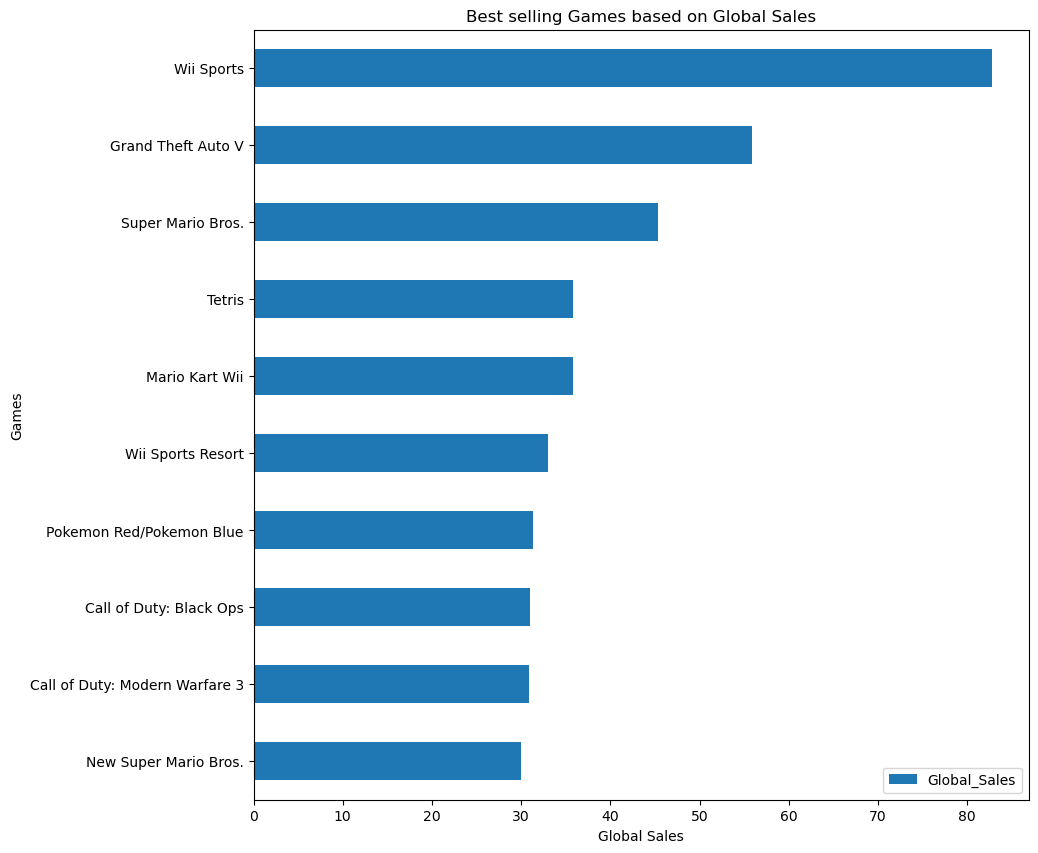

In [141]:
# Top performing Games

Games_grouped = df.pivot_table(index= 'Name', values = 'Global_Sales', aggfunc = 'sum') 
Games_grouped = Games_grouped.sort_values(by='Global_Sales', ascending = False).head(10)
print(Games_grouped)
Games_grouped.plot(kind='barh', title = 'Best selling Games based on Global Sales', xlabel='Global Sales', ylabel='Games').invert_yaxis()

<Axes: title={'center': 'Global Sales Trend over years'}, xlabel='Year', ylabel='Sales'>

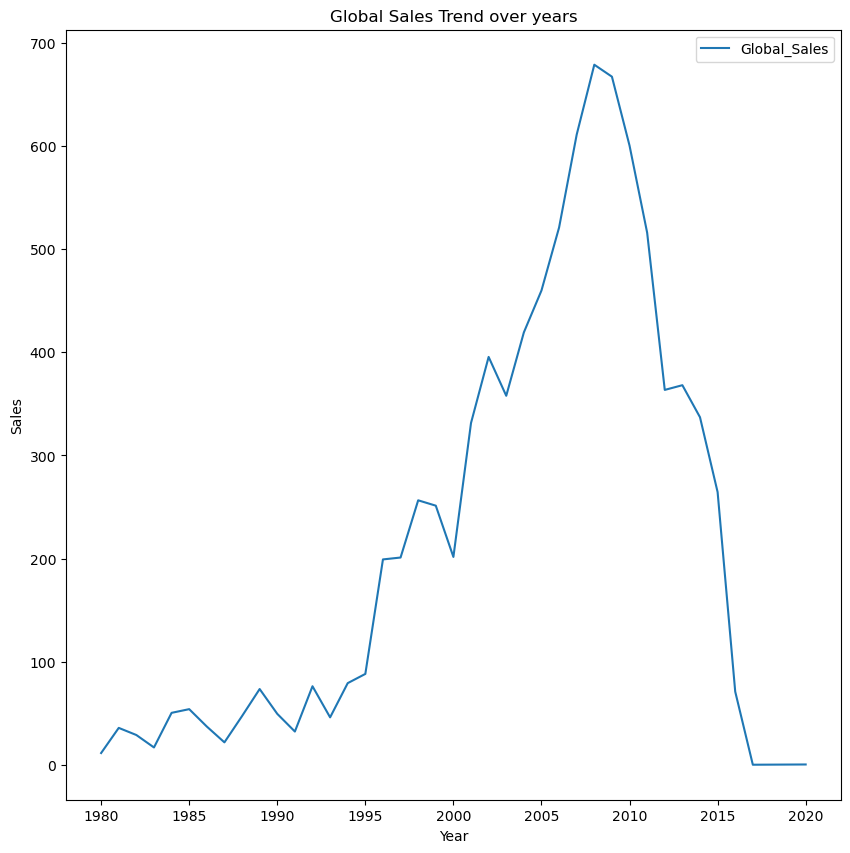

In [153]:
# Global Sales Trend over years

GS_trend = df.pivot_table(index= 'Year', values = 'Global_Sales', aggfunc = 'sum')
GS_trend.plot(title='Global Sales Trend over years', ylabel='Sales')

In [161]:
Sales_pivot = df.pivot_table(index= 'Year', values = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], aggfunc = 'sum')
Sales_pivot

,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Year,,,,,
1980.0,0.67,11.38,0.00,10.59,0.12
1981.0,1.96,35.77,0.00,33.40,0.32
1982.0,1.65,28.86,0.00,26.92,0.31
1983.0,0.80,16.79,8.10,7.76,0.14
1984.0,2.10,50.36,14.27,33.28,0.70
1985.0,4.74,53.94,14.56,33.73,0.92
1986.0,2.84,37.07,19.81,12.50,1.93
1987.0,1.41,21.74,11.63,8.46,0.20
1988.0,6.59,47.22,15.76,23.87,0.99


<Axes: title={'center': 'Various Sales Trend over years'}, xlabel='Year', ylabel='Sales'>

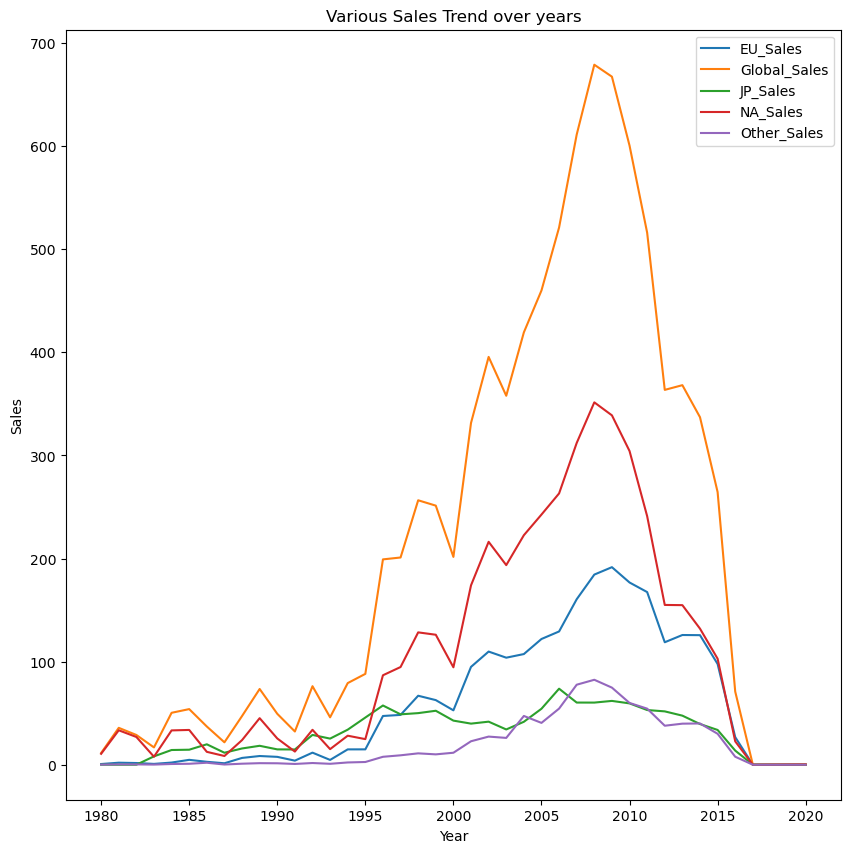

In [165]:
# Plot the data

Sales_pivot.plot(title='Various Sales Trend over years', ylabel='Sales')

In [205]:
# Top Sales for each region

GS = df.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
print(GS.reset_index())

print('________________________________________________________________________________')

NA = df.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['NA_Sales'].sum().sort_values(ascending=False).head(5)
print(NA.reset_index())

print('________________________________________________________________________________')

EU = df.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['EU_Sales'].sum().sort_values(ascending=False).head(5)
print(EU.reset_index())

print('________________________________________________________________________________')

JP = df.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['JP_Sales'].sum().sort_values(ascending=False).head(5)
print(JP.reset_index())

print('________________________________________________________________________________')

Others = df.groupby(['Name', 'Publisher', 'Platform', 'Genre'])['Other_Sales'].sum().sort_values(ascending=False).head(5)
print(NA.reset_index())

                       Name Publisher Platform         Genre  Global_Sales
0                Wii Sports  Nintendo      Wii        Sports         82.74
1         Super Mario Bros.  Nintendo      NES      Platform         40.24
2            Mario Kart Wii  Nintendo      Wii        Racing         35.82
3         Wii Sports Resort  Nintendo      Wii        Sports         33.00
4  Pokemon Red/Pokemon Blue  Nintendo       GB  Role-Playing         31.37
________________________________________________________________________________
                Name Publisher Platform     Genre  NA_Sales
0         Wii Sports  Nintendo      Wii    Sports     41.49
1  Super Mario Bros.  Nintendo      NES  Platform     29.08
2          Duck Hunt  Nintendo      NES   Shooter     26.93
3             Tetris  Nintendo       GB    Puzzle     23.20
4     Mario Kart Wii  Nintendo      Wii    Racing     15.85
________________________________________________________________________________
                 Name       